# Largest inscribed polygon

What is the polygon ($n$ sides) of maximal area that can be completely contained inside a circle of radius 1?

### Model 1: polar coordinates

In [2]:
using JuMP, PyPlot, Ipopt
n = 6

m = Model(solver = IpoptSolver(print_level=0))
@variable(m, 0 <= r[1:n] <= 1 )
@variable(m, 0 <= θ[1:n] <= 2π )

@constraint(m, θ[1] == 0)

# impose an order to the angles
@constraint(m, θ[1] == 0)
for i = 1:n-1
    @constraint(m, θ[i+1] >= θ[i])
end

@NLobjective(m, Max, 0.5*sum( r[i]*r[i+1]*sin(θ[i+1]-θ[i]) for i=1:n-1) + 0.5*r[1]*r[n]*sin(θ[1]-θ[n]))
status = solve(m)

println(status)
println("Optimal area: ", getobjectivevalue(m))
getvalue([r θ*180/π])

Optimal
Optimal area: 2.598076248279773


6×2 Array{Float64,2}:
 1.0    0.0
 1.0   60.0
 1.0  120.0
 1.0  180.0
 1.0  240.0
 1.0  300.0

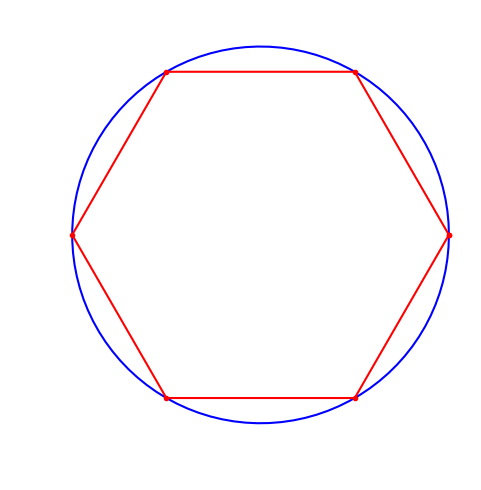

In [4]:
ropt = getvalue([r; r[1]])
topt = getvalue([θ; θ[1]])
t = linspace(0,2π,100)
figure(figsize=[5,5])
plot( cos.(t), sin.(t), "b-" )
plot( ropt.*cos.(topt), ropt.*sin.(topt), "r.-" )
axis("equal");axis("off");tight_layout();

### Model 2: relative polar coordinates

In [6]:
using JuMP, PyPlot, Ipopt
n = 9

m = Model(solver = IpoptSolver(print_level=0))
@variable(m, 0 <= r[1:n] <= 1 )
@variable(m, α[1:n] >= 0 )

# angles sum to 2π
@constraint(m, sum(α) == 2π)

@NLobjective(m, Max, 0.5*sum(r[i]*r[i+1]*sin(α[i]) for i=1:n-1) + 0.5*r[1]*r[n]*sin(α[n]) )

status = solve(m)

println(status)
println("Optimal area: ", getobjectivevalue(m))
getvalue([r α*180/π])

Optimal
Optimal area: 2.89254427888793


9×2 Array{Float64,2}:
 1.0  40.0
 1.0  40.0
 1.0  40.0
 1.0  40.0
 1.0  40.0
 1.0  40.0
 1.0  40.0
 1.0  40.0
 1.0  40.0

### Model 3: rectangular coordinates

In [7]:
# rectangular coordinates

using JuMP, Ipopt
n = 6
m = Model(solver = IpoptSolver(print_level=0))

@variable(m, x[1:n] )
@variable(m, y[1:n] )
   
@NLobjective(m, Max, 0.5*sum( x[i]*y[i+1]-y[i]*x[i+1] for i=1:n-1)  +  0.5*(x[n]*y[1]-y[n]*x[1]) )

for i = 1:n
    @constraint(m, x[i]^2 + y[i]^2 <= 1)
end

# add ordering constraint to the vertices
for i = 1:n-1
    @NLconstraint(m, x[i]*y[i+1]-y[i]*x[i+1] >= 0 )
end
@NLconstraint(m, x[n]*y[1]-y[n]*x[1] >= 0 )

srand(0)
setvalue(x,rand(n))
setvalue(y,rand(n))

status = solve(m)
println(status)
println("Optimal area: ", getobjectivevalue(m))
getvalue([x y])

Optimal
Optimal area: 2.59807622226704


6×2 Array{Float64,2}:
  0.175309  -0.984514
  0.940268  -0.340435
  0.764959   0.644079
 -0.175309   0.984514
 -0.940268   0.340435
 -0.764959  -0.644079

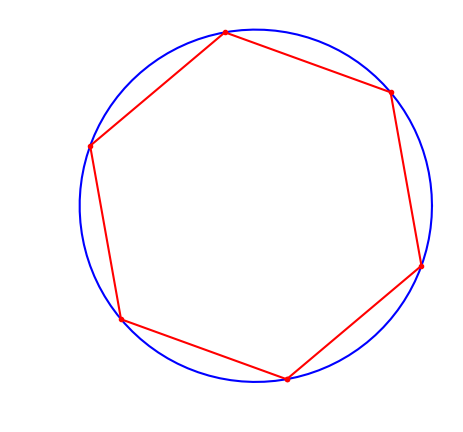

In [8]:
using PyPlot
xopt = getvalue([x; x[1]])
yopt = getvalue([y; y[1]])
t = linspace(0,2π,100)
figure(figsize=[5,5])
plot( cos.(t), sin.(t), "b-" )
plot( xopt, yopt, "r.-" )
axis("equal");axis("off");

In [9]:
using JuMP, Ipopt

m = Model(solver = IpoptSolver(print_level=0))
@variable(m, x )
@NLobjective(m, Min, x^3 )

#setvalue(x, .001)

solve(m)
getvalue(x)

0.0